In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

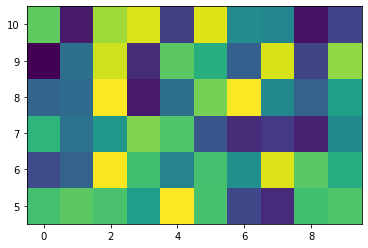

In [3]:
np.random.seed(19680801)
Z = np.random.rand(6, 10)
x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 7

fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z)

## Avoid overlapping in scatterplot with 2D density plot

https://www.python-graph-gallery.com/86-avoid-overlapping-in-scatterplot-with-2d-density

In [2]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

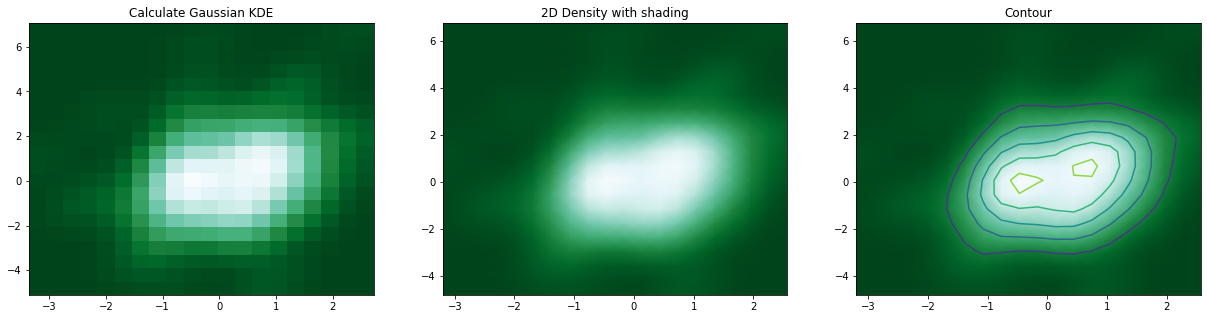

In [12]:
# Create data: 200 points
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 3]], 200)
x, y = data.T
 
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(21, 5))
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
axes[0].set_title('Calculate Gaussian KDE')
axes[0].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.BuGn_r)
 
# add shading
axes[1].set_title('2D Density with shading')
axes[1].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
 
# contour
axes[2].set_title('Contour')
axes[2].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
axes[2].contour(xi, yi, zi.reshape(xi.shape) )

In [13]:
xi.shape

(20, 20)

In [14]:
yi.shape

(20, 20)

In [15]:
zi.shape

(400,)

## Github how to make your own color scheme

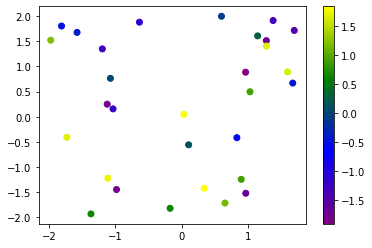

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

x,y,c = zip(*np.random.rand(30,3)*4-2)

norm=plt.Normalize(-2,2)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["purple", "blue","green","yellow"])

plt.scatter(x,y,c=c, cmap=cmap, norm=norm)
plt.colorbar()
plt.show()

## My data

In [ ]:
#%%writefile plot_kde.py
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

fn = '../../results/main/22Rv1/hicnv/tech_run/22Rv1_SRR7760384_hicnv/Kernel_Smoothing/22Rv1.SRR7760384.chr1.kde2d_x.txt'
xdata = pd.read_table(fn, header=None, squeeze=True)

fn = '../../results/main/22Rv1/hicnv/tech_run/22Rv1_SRR7760384_hicnv/Kernel_Smoothing/22Rv1.SRR7760384.chr1.kde2d_y.txt'
ydata = pd.read_table(fn, header=None, squeeze=True)

fn = '../../results/main/22Rv1/hicnv/tech_run/22Rv1_SRR7760384_hicnv/Kernel_Smoothing/22Rv1.SRR7760384.chr1.kde2d_z.txt'
zdata = pd.read_table(fn, header=None, squeeze=True)

# rename the columns and rows
zdata.columns = ydata
zdata.index = xdata 
zdata = zdata.iloc[:, 0:1000]

In [ ]:
fn = '../../results/main/22Rv1/hicnv/tech_run/22Rv1_SRR7760384_hicnv/Kernel_Smoothing/22Rv1.SRR7760384.chr1.counts.txt'
cnv_segs = pd.read_table(fn)

In [ ]:
fn = '../../results/main/22Rv1/hicnv/tech_run/22Rv1_SRR7760384_hicnv/CNV_Estimation/22Rv1.SRR7760384.chr1.cnv.bedGraph'
cnv_segs = pd.read_table(fn)

In [ ]:
################################### Plot the kernel density ###################################

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
xi, yi = np.mgrid[zdata.index.min():zdata.index.max() + 1:1, zdata.columns.min():zdata.columns.max():1]
cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["midnightblue", "navy", "blue", 
                                                         "darkgreen", "green", "lime",
                                                         "greenyellow", "yellow"])

# calculate the top quant of nonzero entries
nonzeros = zdata.values.flatten()
nonzeros = nonzeros[nonzeros > 0]
top_quant = np.quantile(nonzeros, 0.95)

# Create a figure
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(21, 5))

fig.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=ax)
 
# plot a density
ax.pcolormesh(xi, yi, zdata.values.reshape(xi.shape), shading='flat', vmin=0, vmax=top_quant, cmap=cmap)

################################### Plot the CNV data ###################################
xcnv = []
ycnv = [] 
max_xidx = zdata.index.max()

for (start, end, smooth, state) in cnv_segs[['start.index', 'end.index', 'smooth_count', 'state']].values.tolist():
   
    if end > max_xidx:
        print('b')
        break
    xcnv.append(start)
    xcnv.append(end)
    ycnv.append(state)
    ycnv.append(state)
    
xcnv = np.array(xcnv)
ycnv = np.array(ycnv)

ax2 = ax.twinx()
ax2.set_ylabel('test')
ax2.plot(xcnv, ycnv, color='red')

# fn = 'test.plot.png'
# fig.savefig(fn)

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(21, 5))

################################### Plot the CNV data ###################################
xcnv = []
ycnv = [] 
max_xidx = zdata.index.max()

for (start, end, smooth, state) in cnv_segs[['start.index', 'end.index', 'smooth_count', 'state']].values.tolist():
   
    if end > max_xidx:
        print('b')
        break
    xcnv.append(start)
    xcnv.append(end)
    ycnv.append(state)
    ycnv.append(state)
    
xcnv = np.array(xcnv)
ycnv = np.array(ycnv)

ax.set_title('Chr1')
ax.set_ylabel('Copy Number')
ax.plot(xcnv, ycnv, color='red')

# fn = 'test.plot.png'
# fig.savefig(fn)